# Bangalore Housing Price Prediction

In [1]:
# Importing essential libraries
import pandas as pd 
import numpy as np 

import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pickle                               # To Save the model in HDD
    


In [2]:
# Loading the dataset
df = pd.read_csv("Bengaluru_House_Data.csv") 
df.head()  # First 5 records from dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#  Checking the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


There are 13320 samples and 9 variables. There are few features with missing values.

In [5]:
df.shape           # shows number of rows and number of columns of present in dataset

(13320, 9)

In [6]:
# count of features in area type samples
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# To make a model simple here I am going to drop some columns
df2 = df.drop(['area_type','availability','balcony','society'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning 

In [8]:
df2.isnull().sum() # This shows the perticular column value is null or not

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# Here Bath column and size column have 73 and 16 null values so we drop these columns
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3['size'].unique()  # gives unique values from size column because this column show 2 BHK, 3 BHK, 4 BHK  and manymore

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # it creates new column named bhk and show int value of bhk availble in size column

<ipython-input-12-bdcfbc905425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # it creates new column named bhk and show int value of bhk availble in size column


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()  # shows unique values from bhk column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>20] # shows the house which have more than 20 bedrooms in it.

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


As we seen above total square feet is having 2400 area and having 43 bedroom which is not possible so we have clean this type of error.

In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Now we can check what kind of variations total_sqft have for that we have to check wheather this column have float value or not.

In [17]:
def is_float(f):
    try:
        float(f)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # ~ this negate operator. this return dataframe back to us.

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Now we can observe from above dataframe that total_sqft column have range values and at some rows its shows unit e.g Sq.meter, perch etc. so we can take average the this range and just ignore the values having unit. For this first we have convert into float value and then will take average.

In [19]:
def convert_sqft_to_num(x):  # this function is to conver range values into float and takes average of both nymbers.
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [20]:
# just testing the above function working properly or not
convert_sqft_to_num('7-6') # it works properly.

6.5

In [21]:
df4 = df3.copy() # creates new dataframe name df4 which is same as df3 dataframe. 
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)  # we have applied 'convert_sqft_to_num' function to new dataframe df4.
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Now we can check index 30 from dataframe df3 which is having range 2100 - 2850. After applying this function in df4 will get following result.

In [22]:
df4.loc[30]  # shows data of 30th number index from dataframe df4. See the total_sqft data which is 2475.0 which is the average of 2100 - 2850.

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
df5 = df4.copy() # create new dataframe named df5
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # create new column in df5 dataframe name'price_per_sqft' which is division of price and total_sqft.

df5.head(10)                                                    # considering price is in lakhs.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [24]:
df5.location.unique() # show the unique number of loations 

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df5.location.unique()) # shows how many rows available in dataset for location

1304

In [26]:
df5.location = df5.location.apply(lambda x: x.strip()) # shows How many data points available for location and removes space in location column if availabe
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False) 
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
#Total number unique location categories are
len(location_stats)

1293

In [28]:
# Get total number of categories where data points are less than 10
print('Total no of locations where data points are more than 10 = %s' % (len(location_stats[location_stats > 10])))
print('Total no of locations where data points are less than 10 = %s' % (len(location_stats[location_stats <= 10])))

Total no of locations where data points are more than 10 = 241
Total no of locations where data points are less than 10 = 1052


Any location having less than 10 data points should be tagged as "Other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [29]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
# Using lambda function assign the 'other' type to every element in 'location_stats_less_than_10'
df5.location = df5.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x )
len(df5.location.unique())

242

Since 1052 location with less than 10 data points are converted to one category 'other' Total no of unique location categories are 241+1 = 242

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal
- An outlier is an observation which is does or does not fit in created model. Or they may a data points that represent the extreame variation of     dataset.
- In this case (this project) we are going to remove the otliers because this is data generalisation model and outliers may affect on performance     of our model.
- To remove the outliers we can use domain knwoledge and standard deviation.

### Using domain knowledge for outlier removal
Normally square fit per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
* If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
* We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

In [32]:
df5.shape

(13246, 7)

In [33]:
# This shows the data where square fit per bedroom is less than 300
df5[df5.total_sqft / df5.bhk < 300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,Other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


As we seen, we have 744 training examples where square fit per bedroom is less than 300. These are outliers, so we can remove them.

In [34]:
df5.shape

(13246, 7)

In [35]:
df6 = df5[~((df5.total_sqft / df5.bhk) < 300)] # we use '~' (negate) sign to filter all the rows of dataset.
df6.shape

(12502, 7)

##### Outlier Removal - Using Standard Deviation and Mean

In [36]:
# we can access basic stats of column 'price_per_sqft'
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

 Its important to understand that price of every house is location specific. We are going to remove outliers using 'price_per_sqft' for each location

### Standard Deviation
- Standard deviation is measure of spread that is to khow how much does the data vary from the average
- A low standard deviation tells us that the data is closely clustered around the mean (or average), while a high standard deviation indicates that the data is dispersed over a wider range of values.
- One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.e. Data between (mean - std deviation) & (mean + std deviation) is 1     Sigma and which is equal to 68%
* Here any datapin t outside the 1 Sigma deviation (68%) is outlier for us.

Text(0, 0.5, 'Count')

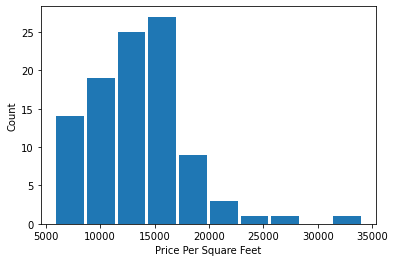

In [37]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar'
# It's normal distribuation of data so outlier removal using stad deviation and mean works perfectly here
plt.hist(df6[df6.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

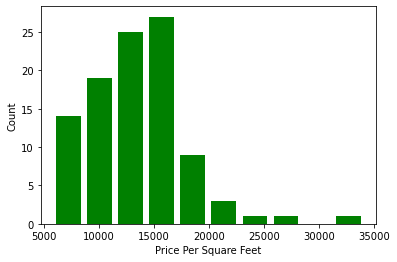

In [38]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar' after outlier removal
plt.hist(df6[df6.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8, color = 'Green')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
# Function to remove outliers using pps(price per sqft)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

### Using domain knowledge for outlier removal
* If location and square foot area is aslo same then price of 3 BHK should be more than 2 BHK
* There are other factors that also affect the price but for this exercise we are treating such values as outlier and remove them.

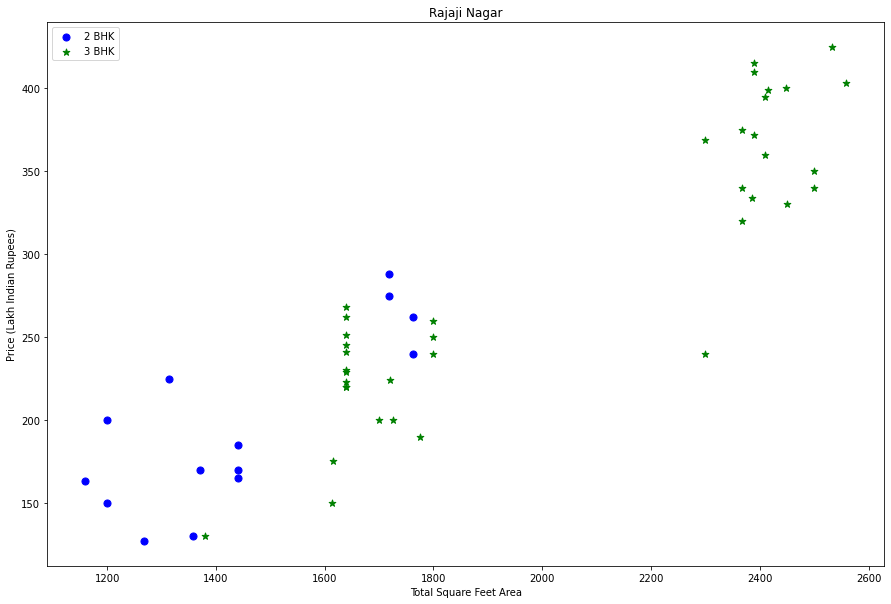

In [40]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")  # we can change specific location here for more understanding

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

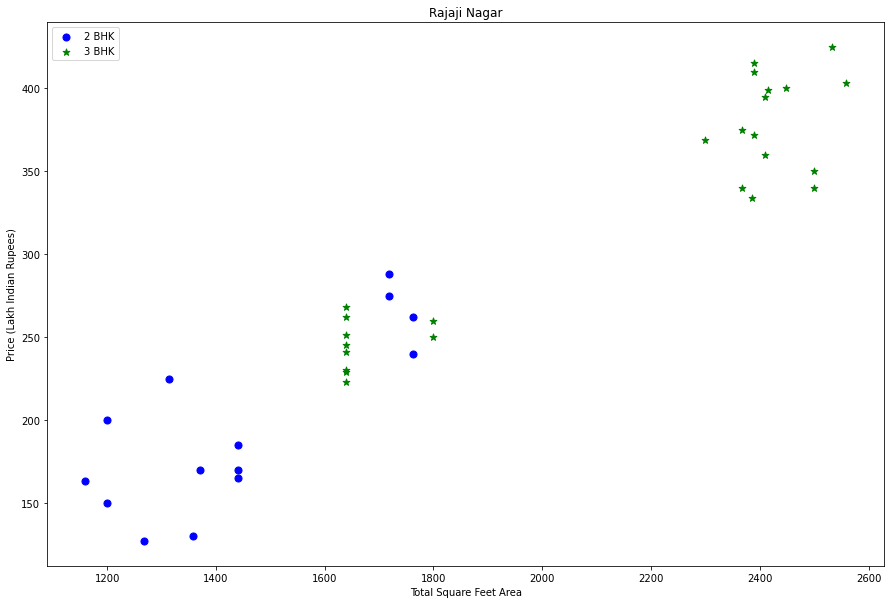

In [42]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df8,"Rajaji Nagar")

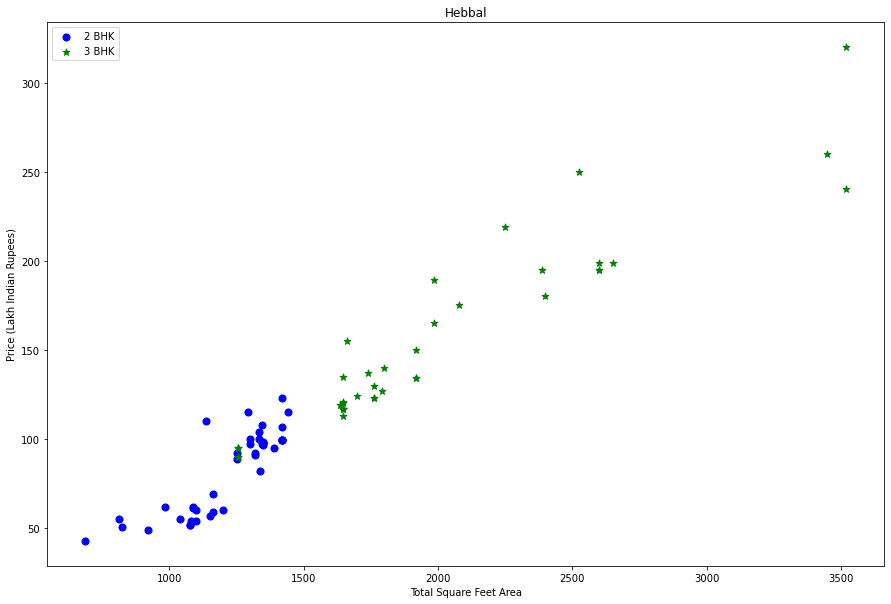

In [43]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

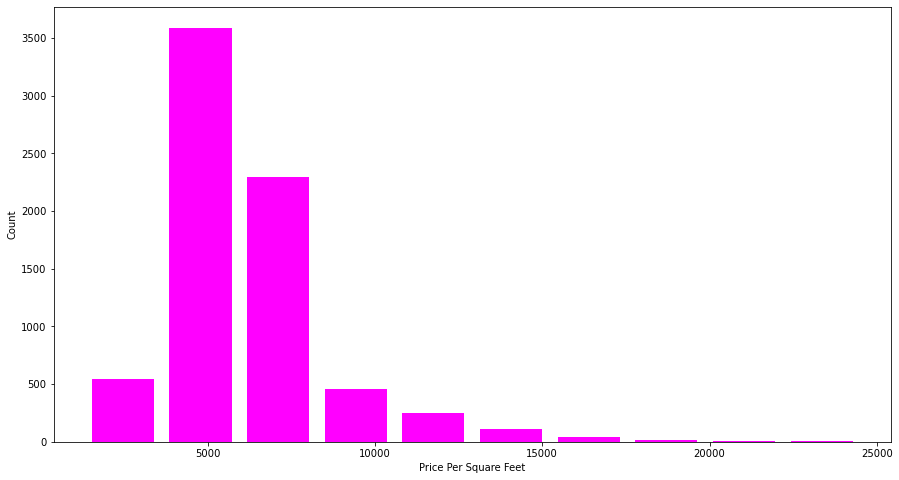

In [44]:
#Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (15,8)
plt.hist(df8.price_per_sqft,rwidth=0.8, color = 'Magenta')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Using domain knowledge for outlier removal
* Generally number of bathrooms per BHK are (no of BHK) + 2.
* So using above understanding we can identify the outliers and remove them

In [45]:
#Get unique bath from dataset
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
# Get the training examples where no of bathrooms are more than 10.
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

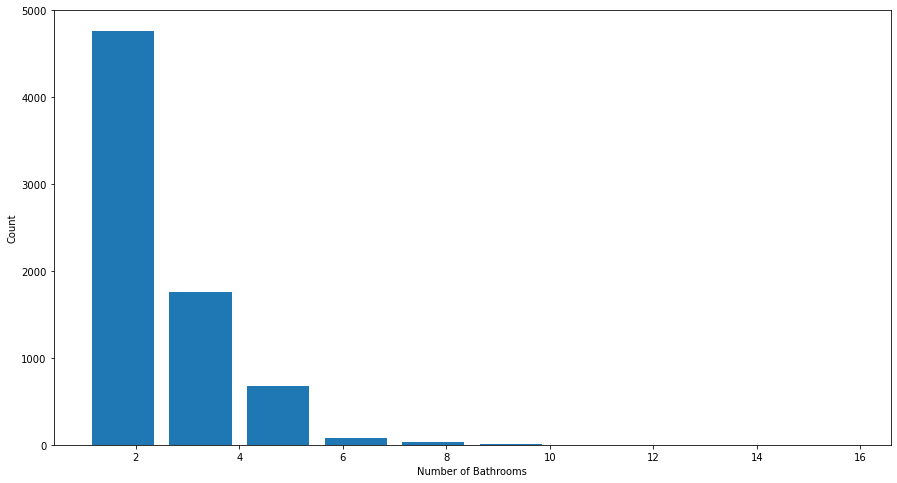

In [47]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [48]:
#Get the training examples where no of bath are more than (no of BHK +2)
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [49]:
#Lets check current dataset shape before removing outliers
df8.shape

(7329, 7)

In [50]:
# Remove the outliers with more than (no of BHK + 2) bathrooms
df9 = df8[df8.bath < (df8.bhk + 2)]
df9.shape

(7251, 7)

This concludes our data cleaning, lets drop unnecessary columns
* Since we have 'bhk' feature lets drop 'size'
* We have crerated 'price_per_sqft' for outlier detection and removal purpose, so we can also drop it. 

In [51]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Since we have 'location' as categorical feature lets use One Hot Encoding to create separate column for each location category and assign binary value 1 or 0, because Machine learning model can not interpret the text data. So we have to convert location column into numerical column. And there is way to convert text data or categorial data into numerical data is to use One Hot Encoding or also called dummies method.

In [52]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# To avoid dummy variable trap problem lets delete the one of the dummy variable column eg. 'Other'
df11 = pd.concat([df10, dummies.drop('Other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Lets delete the location feature now
df12 = df11.drop('location', axis ='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Now we Build Machine Learning Model

In [55]:
df12.shape            # Final shape of our dataset is

(7251, 245)

Now we create variable x which contain only independent variable. here dependant variable is price which we have to drop so we can get value of x.  X(independent variable/features) and y(dependent variables/target)
          

In [56]:
X = df12.drop(['price'], axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Split the dataset to training andtest dataset

#### We divide dataset into train  and test dataset.  We use training dataset for model training and to evaluate the model performance we use test dataset.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_train, y_train)


0.84680610123654

In [60]:
linear_reg.score(X_test, y_test)

0.8691914452174425

We use K Fold cross validation to measure accuracy of our LinearRegression model using Sklearn cross_val_score function

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit          # Randomise the sample so each fold have equal distribution

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

### LASSO  Regressor (Least Absolute Shrinkage Selector Operator)

In [62]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_train, y_train)


0.6903263026358326

In [63]:
lasso_reg.score(X_test, y_test)

0.7622233301303953

## Ridge Regressor

In [64]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [65]:
ridge_reg.score(X_train, y_train)

0.7564618931757199

In [66]:
ridge_reg.score(X_test, y_test)

0.7957463895934985

## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [68]:
tree_reg.score(X_train, y_train)

0.9916077130072789

In [69]:
tree_reg.score(X_test, y_test)

0.8114413447759352

In [70]:
r2_score(tree_reg.predict(X_train),y_train)

0.991536686451067

we can cross validate it.

In [71]:
cross_val_score(tree_reg, X_train, y_train, cv=10)

array([0.75624962, 0.72136354, 0.75129369, 0.72605763, 0.3167367 ,
       0.79303059, 0.45390285, 0.77766182, 0.78719528, 0.83903389])

In [72]:
tree_score = r2_score(tree_reg.predict(X_test), y_test) 
tree_score

0.8219404960779277

## Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()


In [74]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
forest_reg.score(X_train, y_train)

0.9598248275690874

In [76]:
forest_reg.score(X_test, y_test)

0.8505674804026716

In [77]:
cross_val_score(forest_reg, X_train, y_train, cv=10)

array([0.76944859, 0.81586934, 0.81317555, 0.80639502, 0.67443582,
       0.83465794, 0.56052127, 0.83500058, 0.83694945, 0.87624795])

In [78]:
forest_score = r2_score(forest_reg.predict(X_test),y_test)
forest_score

0.817941446727553

We can use GridSearchCV to find the best alogithm selection also called hyperparamter tunning for model.

In [79]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet


def find_best_model_using_gridsearchcv(X,y):
    algos ={
        'Linear regression':{
            'model':LinearRegression(),
            'params': {
            'normalize':[True,False]
            }
        },
        
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
                }
        },
        
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [10,100],
                'max_depth': [1,2,3]
                }
        },
        
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'alpha' : [1],
                
                
                }
            }
        
        }
    scores= []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
            })
    return pd.DataFrame(scores,columns=['model','best_score'])
    
find_best_model_using_gridsearchcv(X,y)

,model,best_score
0,Linear regression,0.853373
1,Lasso,0.727543
2,Decision tree,0.720242
3,Random Forest,0.676223
4,Ridge Regression,0.854416


Based on above results we can say that LinearRegression gives the best score. Hence we will use linear Regression model for price prediction.

## Testing Model

Since all our locations are now columns in form of dummy variabales, all other dummy variables value should be 0 except the one(dummy variable column for our location) we are predicting for.
Now we will assign value '1' to this index and keep all other dummy variable columns as '0'.

In [80]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [90]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linear_reg.predict([x])[0]

In [91]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

82.81981031363556

In [92]:
predict_price('Indira Nagar',1000, 2, 2)

179.37066882807503

In [93]:
predict_price('Rajaji Nagar',550, 1, 1)

186.77643493085844

In [85]:
import pickle
with open('Bangluru_home_prices.pk','wb') as f:
    pickle.dump(linear_reg,f)